In [2]:
# Dimension reduction and clustering of voting data
# 2 April 2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Load the data
votes = pd.read_csv("2011_cleaned_votes.csv", sep=";")

# View first few rows and the shape
votes

,party,numeric_vote1,numeric_vote3,numeric_vote4,numeric_vote5,numeric_vote6,numeric_vote7,numeric_vote8,numeric_vote9,numeric_vote10,...,numeric_vote940,numeric_vote941,numeric_vote942,numeric_vote943,numeric_vote944,numeric_vote945,numeric_vote946,numeric_vote947,numeric_vote948,numeric_vote949
0,D,0,-1,-1,1,-1,0,-1,-1,-1,...,1,1,-1,1,-1,-1,-1,-1,1,-1
1,R,0,1,1,-1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,-1,1
2,D,0,-1,-1,1,-1,0,1,-1,-1,...,1,1,-1,1,-1,-1,-1,-1,1,-1
3,R,0,1,1,-1,1,0,1,1,1,...,1,-1,1,1,1,1,1,1,-1,1
4,R,0,1,1,-1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,R,0,1,1,-1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,-1,1
422,R,0,1,1,-1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,-1,1
423,D,0,-1,-1,1,-1,0,1,-1,-1,...,1,1,-1,1,-1,-1,-1,-1,1,0
424,R,0,1,1,-1,1,0,1,1,1,...,1,1,1,-1,1,1,1,1,-1,1


In [3]:
# Separate features and labels
X = votes.iloc[:, 1:].values  # numeric vote data
y = votes['party'].values     # 'R' or 'D'

# Apply PCA (no scaling since votes are on same scale)
pca = PCA()
pca_output = pca.fit_transform(X)

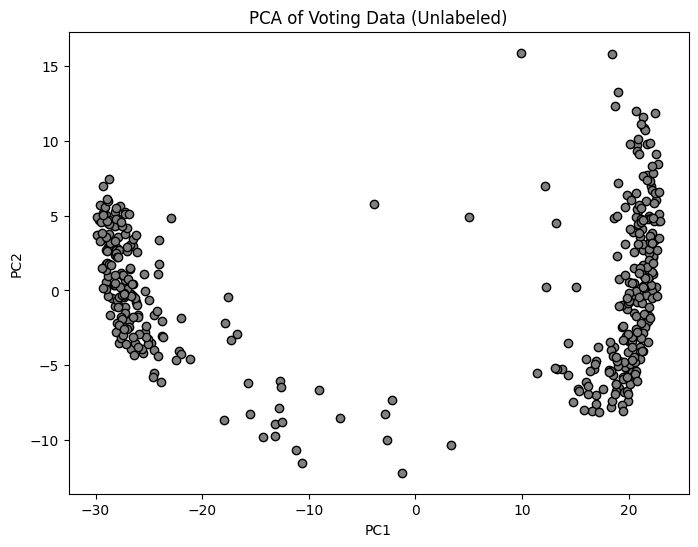

In [4]:
# Plot first two principal components
z1, z2 = pca_output[:, 0], pca_output[:, 1]
plt.figure(figsize=(8,6))
plt.scatter(z1, z2, c='gray', edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Voting Data (Unlabeled)")
plt.show()


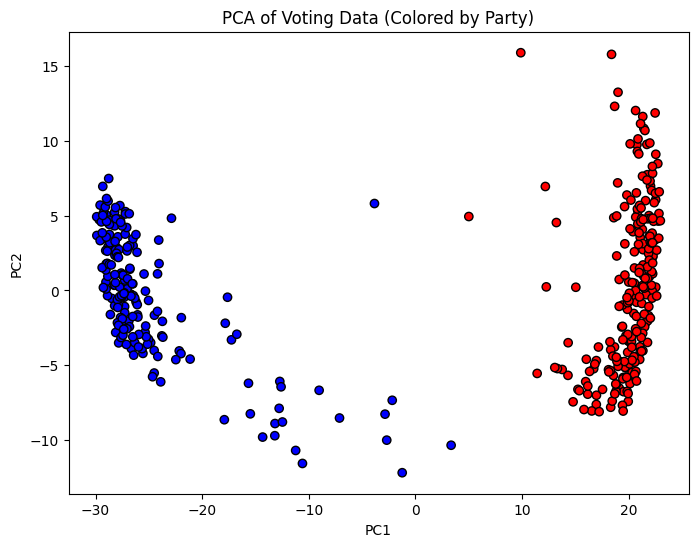

In [5]:
# Plot again, now with partisan colors
colors = ['red' if party == 'R' else 'blue' for party in y]
plt.figure(figsize=(8,6))
plt.scatter(z1, z2, c=colors, edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Voting Data (Colored by Party)")
plt.show()

In [6]:
# Variance explained by each principal component
pca_var = pca.explained_variance_
total_var = np.sum(pca_var)
explained_variance_ratio = pca_var / total_var
print("Variance explained by first 10 PCs:")
print(explained_variance_ratio[:10])

Variance explained by first 10 PCs:
[0.68358618 0.03103327 0.01512266 0.01256084 0.00723723 0.00654537
 0.00528542 0.00470124 0.00396653 0.00371744]


In [8]:
# Clustering using KMeans
kmeans = KMeans(n_clusters=2, n_init=20, random_state=24)
kmeans.fit(X)
cluster_assignments = kmeans.labels_

# Compare first 20 cluster assignments and actual party
print("KMeans Cluster Assignments (first 20):", cluster_assignments[:20])
print("Actual Party Labels (first 20):", y[:20])

# Map clusters to party labels
# We'll assume the cluster with more Republicans is cluster 'R'
cluster_df = pd.DataFrame({'cluster': cluster_assignments, 'party': y})
cluster_to_party = cluster_df.groupby('cluster')['party'].agg(lambda x: x.mode()[0])
mapped_clusters = [cluster_to_party[c] for c in cluster_assignments]

# Accuracy of clustering
correct = np.sum(mapped_clusters == y)
print(f"Correctly classified: {correct}/{len(y)} ({correct / len(y) * 100:.2f}%)")

KMeans Cluster Assignments (first 20): [1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0]
Actual Party Labels (first 20): ['D' 'R' 'D' 'R' 'R' 'D' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'D' 'D' 'R' 'D' 'D'
 'D' 'R']
Correctly classified: 421/426 (98.83%)
